1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

21 2000
-1.3278698237425184
-0.17864851761204892
1.45570720945073
0.9698604855530396
-1.203955236750998
0.8378901196627314
0.6708543120603313
0.06006326351545936
0.8848135404462288
-0.28424787212363645
2.2693149931720544
-0.7831173366626292
-1.3075441930672511
-0.14041693171638187
-0.9862351414385024
-0.6665860919387524
1.4473698784350333
-1.544831676877726
0.11310214823824118
1.43809387986027
1.167135733328427
0.6784732078379819
1.011253940238355
-0.2660775362416838
1.130489524108007
0.4567380604420831
-0.4636004227878878
-0.22022703520341735
0.06253377505885081
0.6891868261294596
0.44996396127948446
0.7489729869421927
0.9389662459245739
-1.4560752562831911
-0.9045467721352611
0.9734339624200264
-0.4125359976859079
1.8373311302756763
-1.9166413221442138
0.5754700425402229
-1.574098689806546
-1.728634631540762
0.08730858242555309
0.7276451402446521
-0.9187477641982461
0.6508152935789497
-0.39316310872720395
0.370229325842572
-1.4612233866470736
0.4850979612959704
0.3624088076308615
0.0

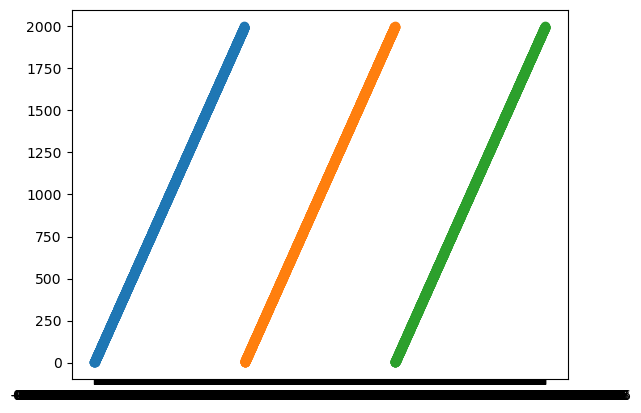

In [1]:
import csv
import matplotlib.pyplot as plt

filename = 'regression_generated.csv'
data = csv.reader(open(filename, newline=''), delimiter=',')
header = next(data)  # skip first line
dataset = list(data)
x_len = len(dataset[1])
y_len = len(dataset)
print(x_len, y_len)
features1 = list()
features2 = list()
features3 = list()
y = list()
for i in range(1, y_len):
    print(dataset[i][2])
    features1.append(dataset[i][1])
    features2.append(dataset[i][2])
    features3.append(dataset[i][3])
    y.append(i)

plt.scatter(features1, y)
plt.scatter(features2, y)
plt.scatter(features3, y)
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

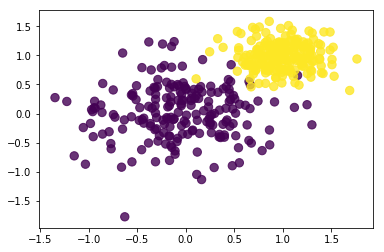

In [1]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

Image('images/two_categories_scatter_plot.png')


def cate(meanList, covList, N):
    data_1 = cate_data(meanList[0], covList[0], N)
    data_2 = cate_data(meanList[1], covList[1], N)
    return cate_df(data_1), cate_df(data_2)


def cate_data(mean, cov, N):
    return np.intrandom.multivariate_normal(mean, cov, N)


def cate_df(data):
    return pd.DataFrame(data, columns=["x", "y"])


mean = ([2, 3], [6, 9])
covariance = ([[-5, 0], [0, 5]], [[-3, 0], [0, 2]])
N = 500

df1, df2 = cate(mean, covariance, N)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_title("Scatter Plot", fontsize=20)
ax.scatter(x="x", y="y", data=df1, marker="*", c="red", s=100, alpha=0.7)
ax.scatter(x="x", y="y", data=df2, marker="*", c="black", s=100, alpha=0.7)
plt.show()


AttributeError: module 'numpy' has no attribute 'intrandom'

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.
